In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [2]:
dfnames = ['unit','time']
for i in range(3):
    dfnames.append('set'+str(i+1))
for i in range(26):
    dfnames.append('sensor'+str(i+1))

In [3]:
df = pd.read_csv('data/train_FD001.txt', sep=' ', header=None,
                names=dfnames)

In [4]:
df.head()

,unit,time,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor17,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,392,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,392,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,390,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,392,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,393,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN


In [5]:
df1 = df[df['unit']==1]

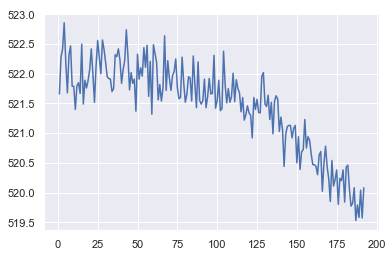

In [6]:
plt.plot(df1['time'],df1['sensor12'])

In [7]:
max_time = df.groupby('unit').agg({'time':'max'})
max_time = max_time.reset_index()
max_time['isFail'] = 'Y'

In [8]:
df2 = pd.merge(df,max_time,on=['unit','time'],how='outer')
df2.head()

,unit,time,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor18,sensor19,sensor20,sensor21,sensor22,sensor23,sensor24,sensor25,sensor26,isFail
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388,100.0,39.06,23.4190,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388,100.0,39.00,23.4236,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388,100.0,38.95,23.3442,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388,100.0,38.88,23.3739,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388,100.0,38.90,23.4044,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df2['isFail'].fillna('N', inplace=True)
df3 = df2.drop(columns=['sensor22',
                  'sensor23',
                  'sensor24',
                  'sensor25',
                  'sensor26'])

In [10]:
print(df3['isFail'].value_counts())
print(df3.shape)

N    20531
Y      100
Name: isFail, dtype: int64
(20631, 27)


In [11]:
#for i in df3.iloc[:,2:5]:
#    print(df3[i].name,':', type(df3[i]))
#    newname = df3[i].name + '-sq'
#    df3[newname] = 1/df3[i]

In [12]:
#for i in df3.iloc[:,5:26]:
#    print(df3[i].name,':', type(df3[i]))
#    newname = df3[i].name + '-sq'
#    df3[newname] = 1/df3[i]

In [30]:
df4 = pd.merge(df3,max_time,on='unit',how='outer')
df4['rul'] = df4['time_y'] - df4['time_x']
df4 = df4.rename(columns={'time_x':'time'})
df4 = df4.drop(columns=['isFail_x', 'time_y', 'isFail_y'])
df4.head()
#df4.columns

,unit,time,set1,set2,set3,sensor1,sensor2,sensor3,sensor4,sensor5,...,sensor13,sensor14,sensor15,sensor16,sensor17,sensor18,sensor19,sensor20,sensor21,rul
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187


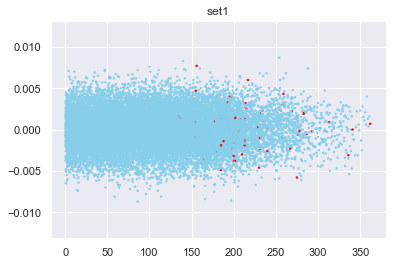

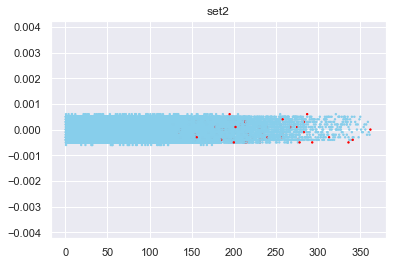

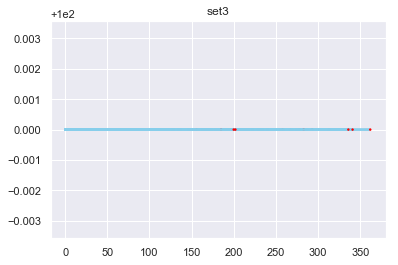

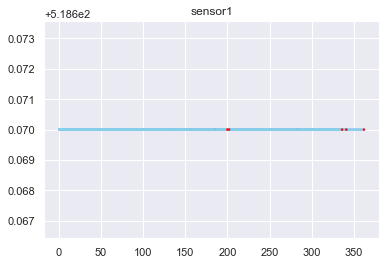

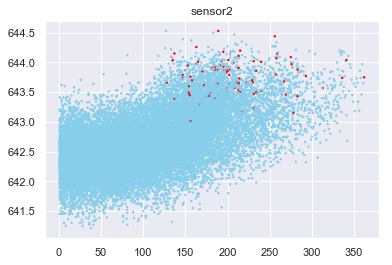

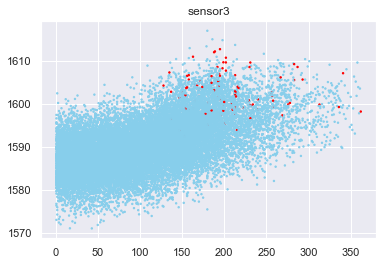

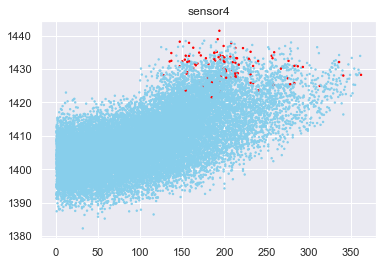

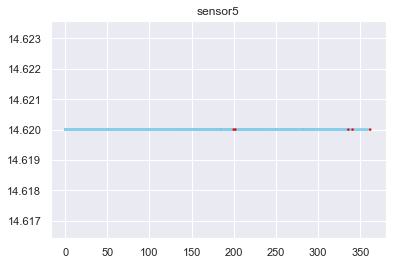

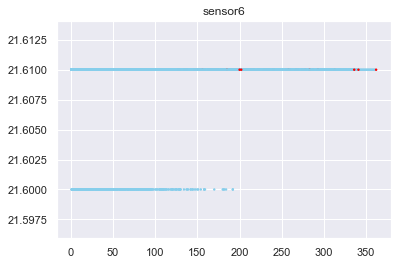

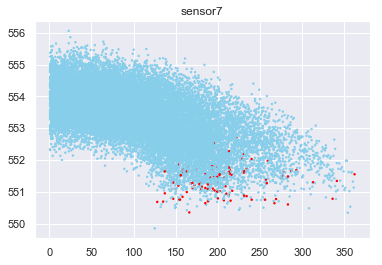

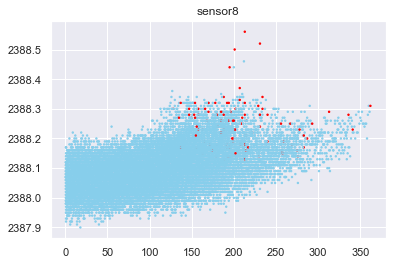

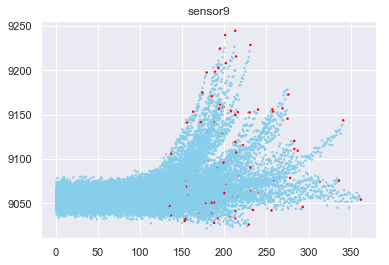

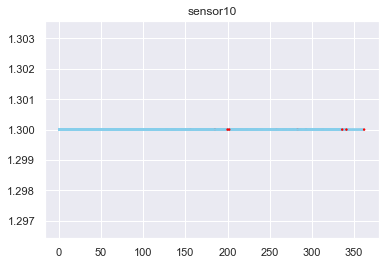

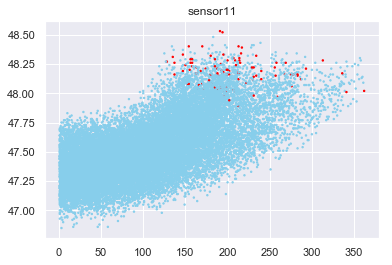

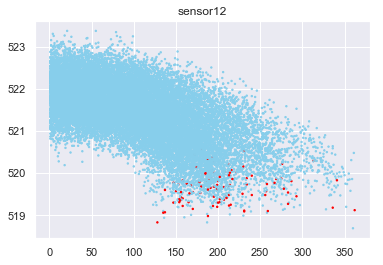

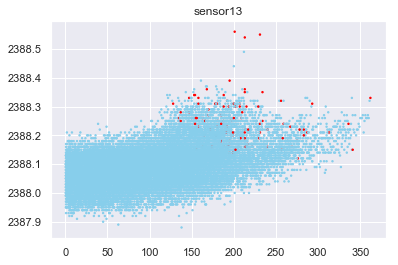

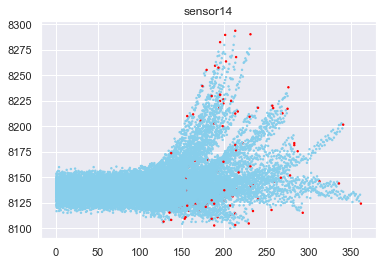

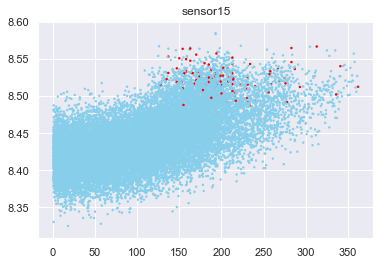

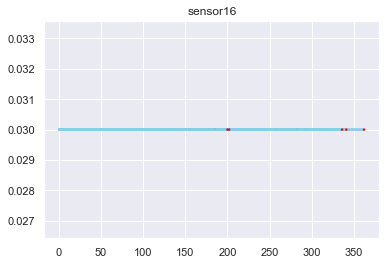

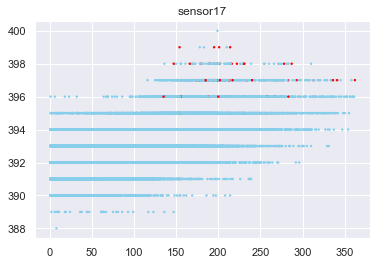

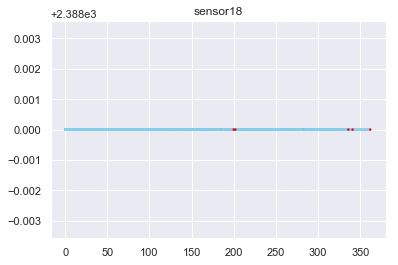

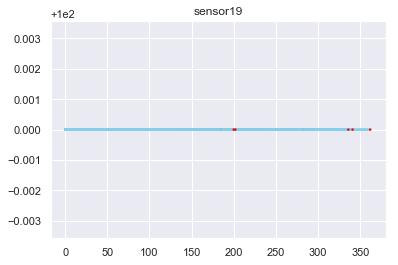

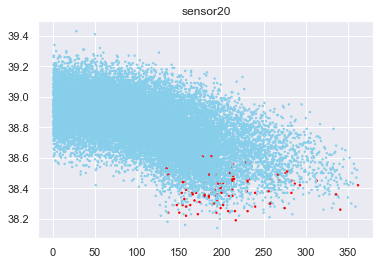

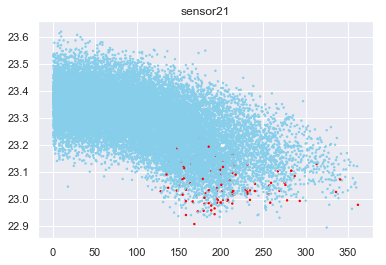

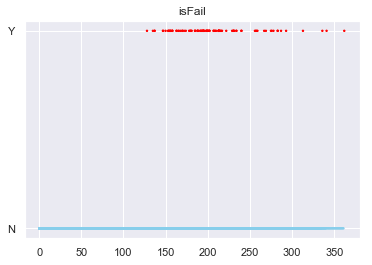

In [13]:
colors=['red' if i=='Y' else 'skyblue' for i in df3['isFail']]
for i in df3.columns[2:]:
    plt.scatter(df3['time'], df3[i], s=2, c=colors)
    plt.title(df3[i].name)
    plt.show()

In [14]:
failures = df3[df3['isFail']=='Y'].drop(columns='isFail')

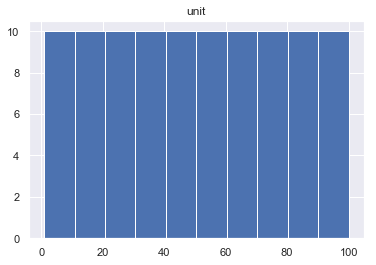

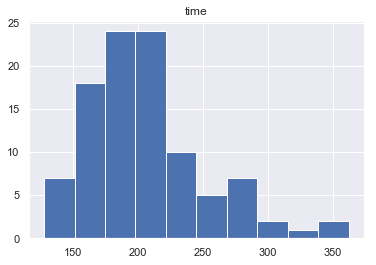

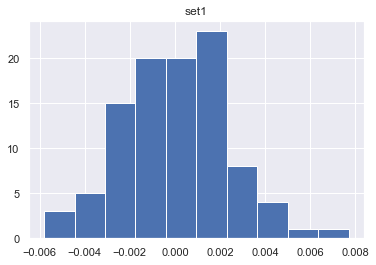

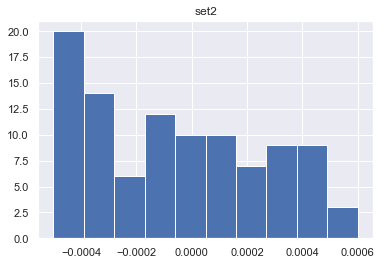

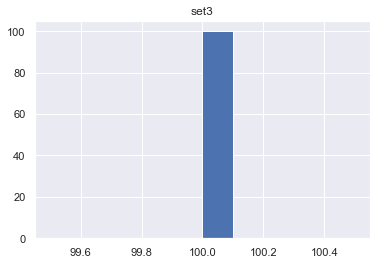

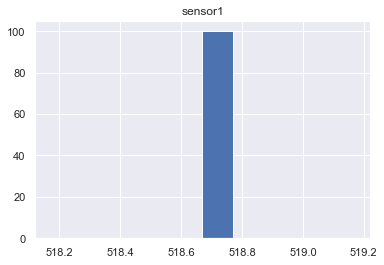

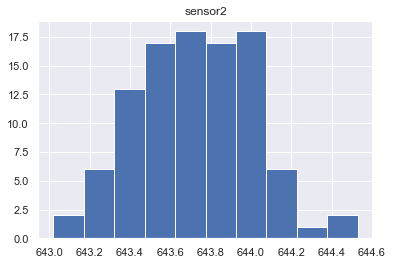

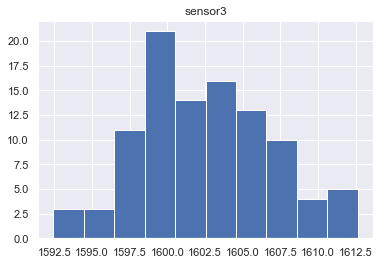

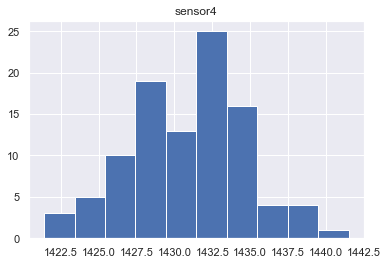

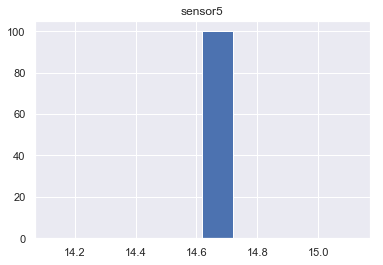

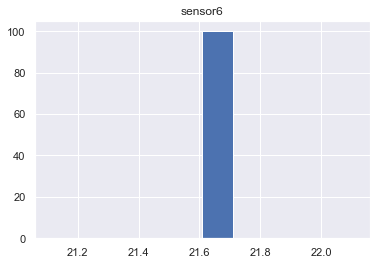

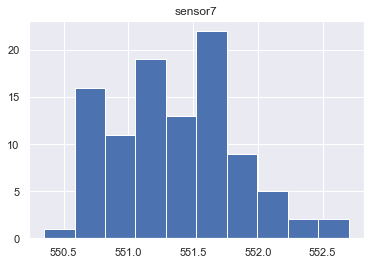

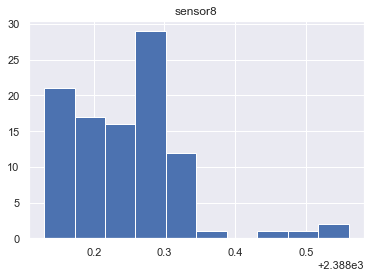

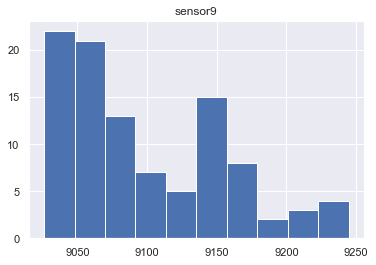

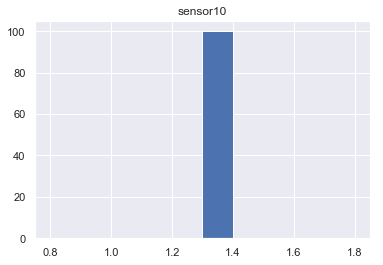

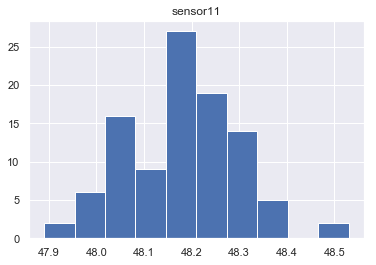

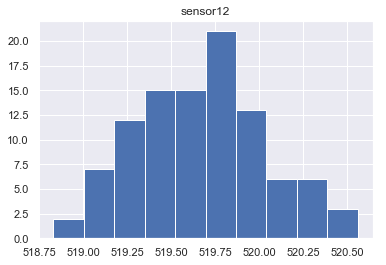

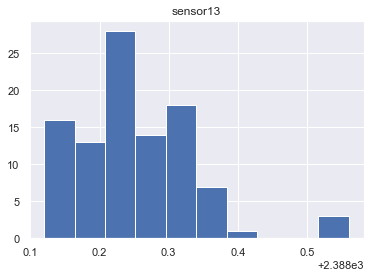

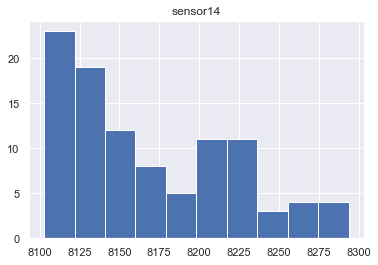

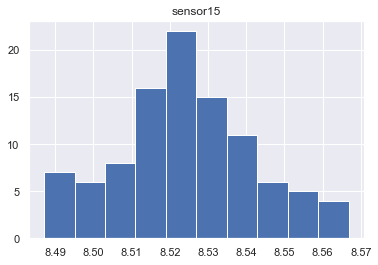

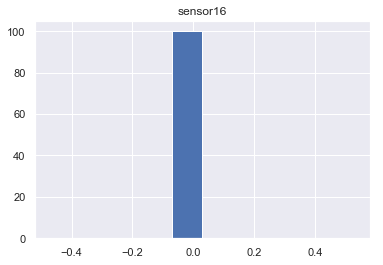

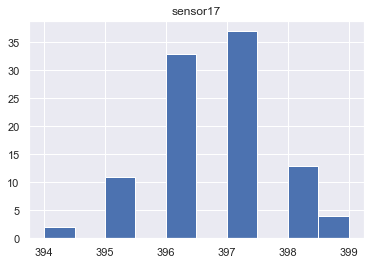

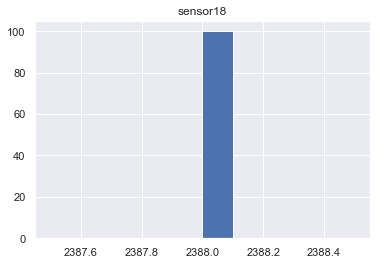

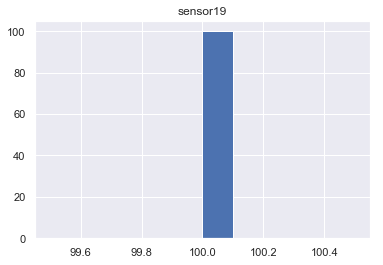

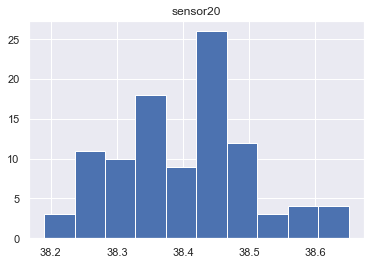

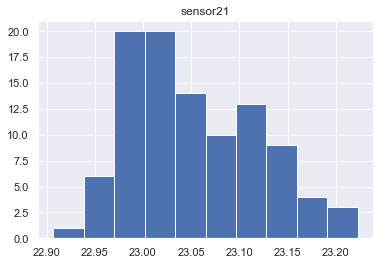

In [15]:
for i in failures[2:]:
    plt.hist(failures[i])
    plt.title(i)
    plt.show(i)

In [115]:
predictors = df4.drop(columns=['unit','rul'])
ridgereg = Ridge(alpha=.01,normalize=True)
scores = cross_val_score(ridgereg, predictors, df4['rul'], cv=10, scoring='neg_mean_absolute_error')
#ridgereg.fit(predictors,df4['rul'])
#y_pred = ridgereg.predict(predictors)
print(np.mean(scores))

-31.83851743740645


In [68]:
y_pred

array([177.57517292, 173.21525203, 180.76329512, ..., -10.05022493,
       -11.35957763, -11.58489502])

In [91]:
results = pd.DataFrame({'pred':y_pred,'actual':df4['rul']})
results['residual'] = results['pred'] - results['actual']
results['squared error'] = results['residual'] ** 2
results['absolute error'] = np.abs(results['residual'])
ssr = results.agg({'squared error':'sum'}).values[0]
print('sum of squared residuals:',ssr)
mas = results.agg({'absolute error':'mean'}).values[0]
print('mean absolute error:',mas)
size = results.shape[0]
rmse = np.sqrt(ssr/size)
print('rmse:',rmse)

sum of squared residuals: 33895540.61639727
mean absolute error: 30.956189022306734
rmse: 40.53322346267303


In [92]:
results

,pred,actual,residual,squared error,absolute error
0,177.575173,191,-13.424827,180.225982,13.424827
1,173.215252,190,-16.784748,281.727764,16.784748
2,180.763295,189,-8.236705,67.843307,8.236705
3,188.819721,188,0.819721,0.671942,0.819721
4,172.781571,187,-14.218429,202.163725,14.218429
5,186.758254,186,0.758254,0.574950,0.758254
6,180.241389,185,-4.758611,22.644378,4.758611
7,183.829610,184,-0.170390,0.029033,0.170390
8,183.321972,183,0.321972,0.103666,0.321972
9,180.271613,182,-1.728387,2.987322,1.728387


In [97]:
cross_val_score?

Signature:
cross_val_score(
    ['estimator', 'X', 'y=None', 'groups=None', 'scoring=None', "cv='warn'", 'n_jobs=None', 'verbose=0', 'fit_params=None', "pre_dispatch='2*n_jobs'", "error_score='raise-deprecating'"],
)
Docstring:
Evaluate a score by cross-validation

Read more in the :ref:`User Guide <cross_validation>`.

Parameters
----------
estimator : estimator object implementing 'fit'
    The object to use to fit the data.

X : array-like
    The data to fit. Can be for example a list, or an array.

y : array-like, optional, default: None
    The target variable to try to predict in the case of
    supervised learning.

groups : array-like, with shape (n_samples,), optional
    Group labels for the samples used while splitting the dataset into
    train/test set.

scoring : string, callable or None, optional, default: None
    A string (see model evaluation documentation) or
    a scorer callable object / function with signature
    ``scorer(estimator, X, y)``.

cv : int, cross-val